In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/shyam/Downloads/Data1.csv', parse_dates=[0])

In [3]:
df.head()

,TIME,Sales,Inflation
0,2007-09-01,95.52058,2.414328
1,2007-10-01,95.37652,2.968873
2,2007-11-01,95.53848,3.513978
3,2007-12-01,94.97173,3.455396
4,2008-01-01,95.21674,3.622073


In [4]:
df.set_index('TIME', inplace=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

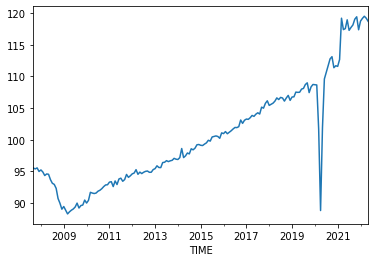

In [6]:
df['Sales'].plot()

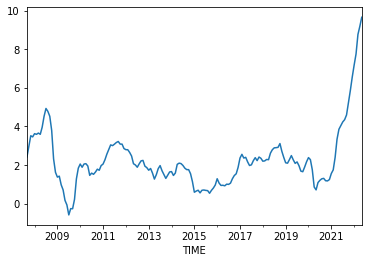

In [7]:
df['Inflation'].plot()

In [8]:
df.describe()

,Sales,Inflation
count,177.000000,177.000000
mean,100.560956,2.258188
std,8.287005,1.551097
min,88.261600,-0.589731
25%,94.500610,1.451779
50%,99.111710,2.006857
75%,106.215700,2.646380
max,119.518000,9.657443


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.6065671963190333
p-value : 0.9877763856555005
#Lags Used : 4
Number of Observations Used : 172
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
adfuller_test(df['Inflation'])

ADF Test Statistic : -0.09213612374346575
p-value : 0.9502161947064868
#Lags Used : 13
Number of Observations Used : 163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

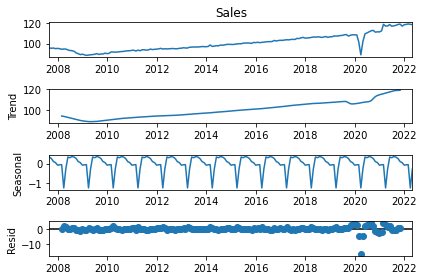

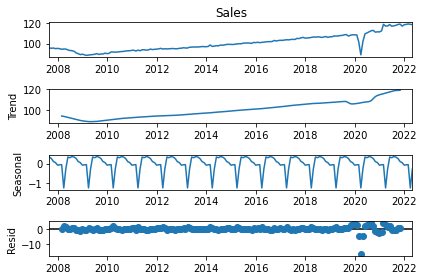

In [14]:
sd_sales=seasonal_decompose(df['Sales'], model='Additive')
sd_sales.plot()

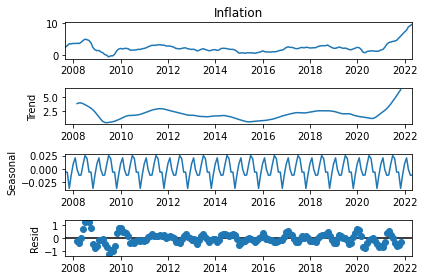

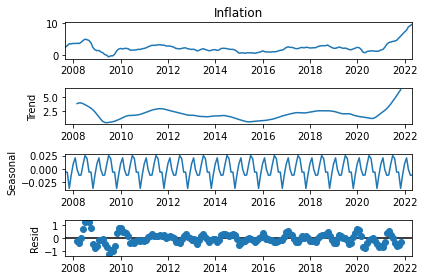

In [15]:
sd_inf=seasonal_decompose(df['Inflation'], model='Additive')
sd_inf.plot()

In [16]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [17]:
df['Sales Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [19]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -9.240279199169038
p-value : 1.589419710674629e-15
#Lags Used : 3
Number of Observations Used : 172
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


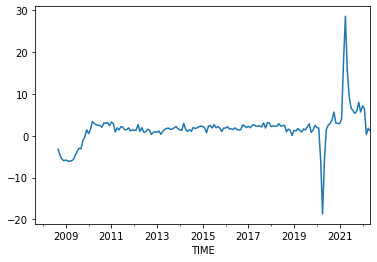

In [20]:
df['Sales Seasonal First Difference'].plot()

In [21]:
df['First Sales Seasonal First Difference']=df['Sales Seasonal First Difference']-df['Sales Seasonal First Difference'].shift(1)

In [24]:
adfuller_test(df['First Sales Seasonal First Difference'].dropna())

ADF Test Statistic : -5.532296655614412
p-value : 1.7763099451048106e-06
#Lags Used : 13
Number of Observations Used : 150
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

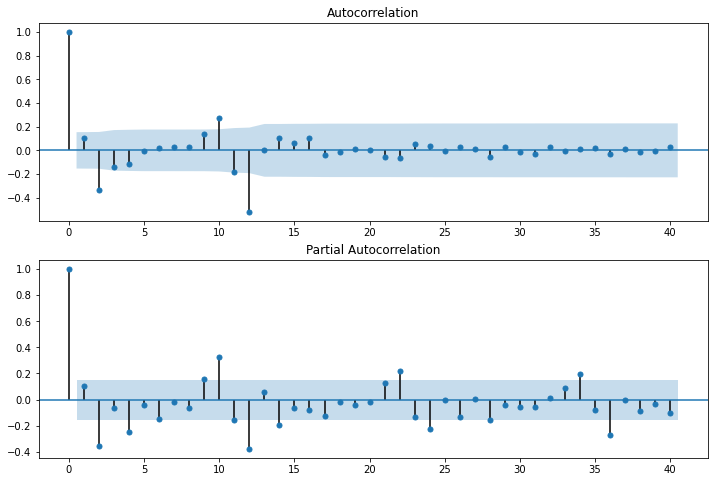

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['First Sales Seasonal First Difference'].iloc[14:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['First Sales Seasonal First Difference'].iloc[14:],lags=40,ax=ax2)

In [28]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12), exog=df['Inflation'])
results_xreg=model.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
results_xreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -333.356
Date:                            Mon, 19 Sep 2022   AIC                            678.713
Time:                                    17:01:26   BIC                            697.312
Sample:                                09-01-2007   HQIC                           686.264
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      1.1867      0.556      2.134      0.033       0.097       2.277
ar.L1         -0.5854      0.216     -2.715      0.007      -1.008      -0.163
ma.L1          0.7551      0.208      3.638      0.000       0.348       1.162
ar.S.L12      -0.0558      0.097     -0.574      0.566      -0.247       0.135
ma.S.L12      -0.8498      0.086     -9.845      0.000      -1.019      -0.681
sigma2         3.0846      0.154     19.981      0.000       2.782       3.387
===================================================================================
Ljung-Box (Q):                       33.56   Jarque-Bera (JB):              8039.47
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              17.70   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_w=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_w=model_w.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
results_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -337.171
Date:                            Mon, 19 Sep 2022   AIC                            684.342
Time:                                    17:03:06   BIC                            699.841
Sample:                                09-01-2007   HQIC                           690.634
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5466      0.171     -3.201      0.001      -0.881      -0.212
ma.L1          0.7375      0.179      4.129      0.000       0.387       1.087
ar.S.L12      -0.0708      0.097     -0.729      0.466      -0.261       0.119
ma.S.L12      -0.8453      0.096     -8.847      0.000      -1.033      -0.658
sigma2         3.2316      0.098     33.005      0.000       3.040       3.423
===================================================================================
Ljung-Box (Q):                       34.57   Jarque-Bera (JB):              8661.08
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              24.58   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
model1=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(2,1,2,12), exog=df['Inflation'])
results1=model1.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [66]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -331.533
Date:                                 Mon, 19 Sep 2022   AIC                            679.066
Time:                                         17:27:51   BIC                            703.865
Sample:                                     09-01-2007   HQIC                           689.134
                                          - 05-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      1.1832      0.555      2.131      0.033       0.095       2.272
ar.L1         -0.5736      0.278     -2.060      0.039      -1.119      -0.028
ma.L1          0.7466      0.270      2.770      0.006       0.218       1.275
ar.S.L12       0.6144      1.183      0.519      0.603      -1.704       2.933
ar.S.L24      -0.1214      0.360     -0.337      0.736      -0.828       0.585
ma.S.L12      -1.5397      1.252     -1.230      0.219      -3.994       0.914
ma.S.L24       0.6804      0.914      0.745      0.456      -1.110       2.471
sigma2         3.0042      0.339      8.870      0.000       2.340       3.668
===================================================================================
Ljung-Box (Q):                       30.36   Jarque-Bera (JB):              8313.81
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              17.45   Skew:                             1.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

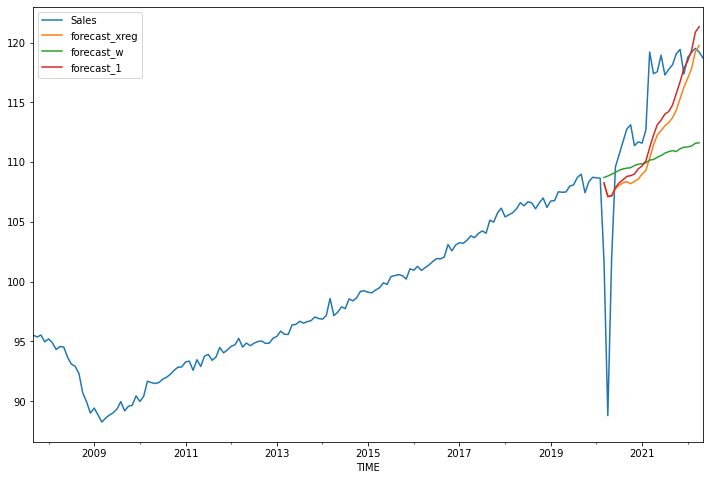

In [68]:
df['forecast_xreg']=results_xreg.predict(start=150,end=175,dynamic=True)
df['forecast_w']=results_w.predict(start=150,end=175,dynamic=True)
df['forecast_1']=results1.predict(start=150,end=175,dynamic=True)
df[['Sales','forecast_xreg','forecast_w','forecast_1']].plot(figsize=(12,8))